In [3]:
# importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing statmodel lib
import statsmodels.api as sm

# importing model, metrecis and preprocessing libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# importing linear model for training data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading data
automobile_df = pd.read_csv('datasets/auto-mgp-processed.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
40,25.4,6,168.0,116,2900,12.6,38
200,22.0,4,122.0,86,2395,16.0,47
316,26.0,4,108.0,93,2391,15.5,45
162,25.0,4,140.0,75,2542,17.0,45
86,19.0,4,121.0,112,2868,15.5,46


In [5]:
# creating dict to hold test and test score for different models
result_dict = {}

In [12]:
# defining a helper function for building models
def build_models(
                 regression_fn,
                 name_of_y_col,
                 names_of_x_cols,
                 dataset,
                 test_frac = 0.2,
                 preprocess_fn = None,
                 show_plot_Y = False,
                 show_plot_scatter = False):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print('Training Score :', model.score(x_train, y_train))
    print('Test Score :', r2_score(y_test, y_pred))
    
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        plt.show()
        
    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Predicted Line', 'Observed Data'])
        plt.show()
        
    return {
        'training_score' : model.score(x_train, y_train),
        'test_score' : r2_score(y_test, y_pred)
    }

In [13]:
# helper function for comparing results
def compare_results():
    for key in result_dict:
        print('Regression Model :', key)
        print('Training Score :', result_dict[key]['training_score'])
        print('Test Score :', result_dict[key]['test_score'])
        print()

In [14]:
# helper function for model and fitting
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train, y_train)
    
    return model

Training Score : 0.7049230727424537
Test Score : 0.6400786348254428


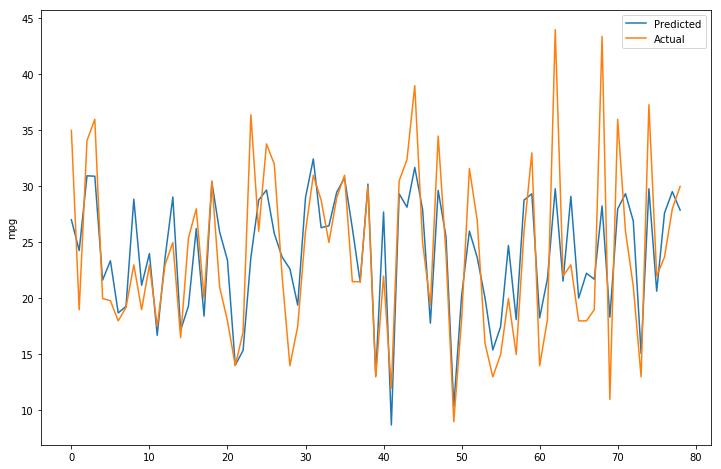

In [17]:
# model based on single feature 
result_dict['mpg_single_linear'] = build_models(linear_reg, 'mpg', ['weight'],\
                                                automobile_df, show_plot_Y=True)

Training Score : 0.7262814641114637
Test Score : 0.6235369204132127


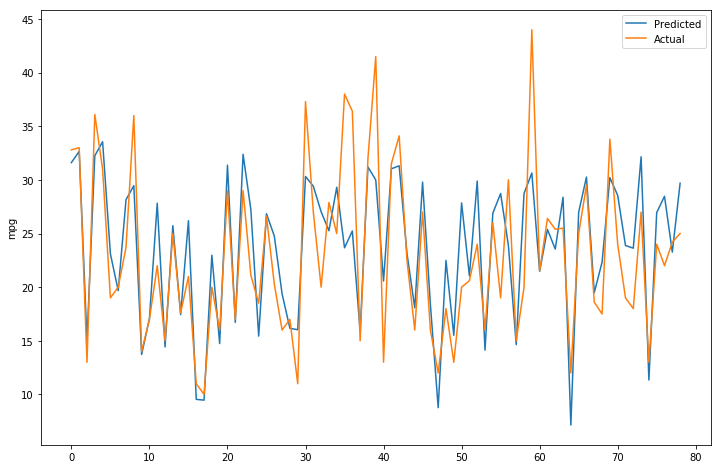

In [18]:
# model based on all feature 
result_dict['mpg_kitchen_sink_linear'] = build_models(linear_reg, 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True)

Training Score : 0.7014756793395163
Test Score : 0.7202104623349477


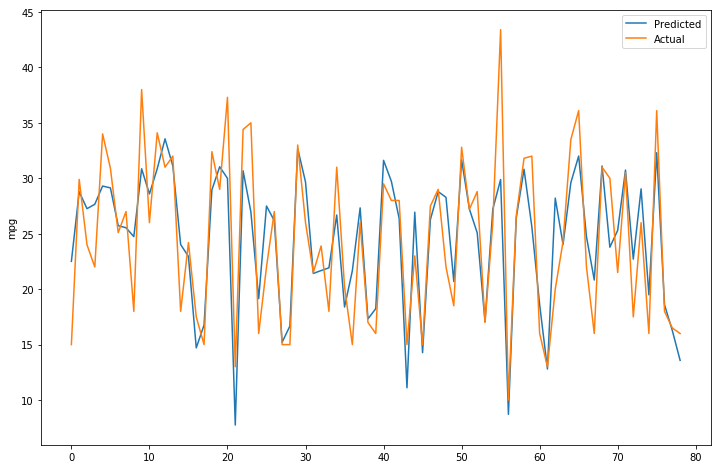

In [19]:
# model based on some parsimonous feature 
result_dict['mpg_parsimonious_linear'] = build_models(linear_reg, 'mpg',\
                                                ['weight', 'horsepower'],
                                                automobile_df, show_plot_Y=True)

In [20]:
# now comparing the results
compare_results()

Regression Model : mpg_single_linear
Training Score : 0.7049230727424537
Test Score : 0.6400786348254428

Regression Model : mpg_kitchen_sink_linear
Training Score : 0.7262814641114637
Test Score : 0.6235369204132127

Regression Model : mpg_parsimonious_linear
Training Score : 0.7014756793395163
Test Score : 0.7202104623349477



In [23]:
# helper function for lasso regression
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training Score : 0.7019158073070649
Test Score : 0.7190347257809007


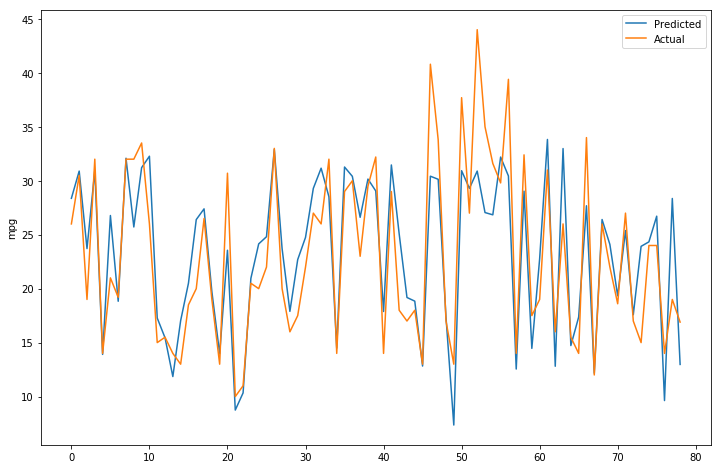

In [24]:
# building lass model
# model based on all feature 
result_dict['mpg_kitchen_sink_lasso'] = build_models(lasso_reg, 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True)

In [25]:
# calling compare results
compare_results()

Regression Model : mpg_single_linear
Training Score : 0.7049230727424537
Test Score : 0.6400786348254428

Regression Model : mpg_kitchen_sink_linear
Training Score : 0.7262814641114637
Test Score : 0.6235369204132127

Regression Model : mpg_parsimonious_linear
Training Score : 0.7014756793395163
Test Score : 0.7202104623349477

Regression Model : mpg_kitchen_sink_lasso
Training Score : 0.7019158073070649
Test Score : 0.7190347257809007



In [26]:
# helper function for ridge regression
def ridge_reg(x_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize)
    model.fit(x_train, y_train)
    
    return model

Training Score : 0.6784894282021642
Test Score : 0.7180641103771415


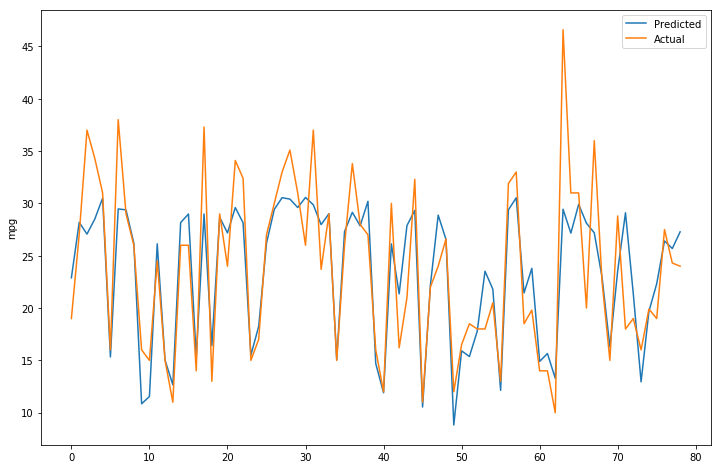

In [27]:
# building ridge model
# model based on all feature 
result_dict['mpg_kitchen_sink_ridge'] = build_models(ridge_reg, 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True)

In [28]:
# calling compare results
compare_results()

Regression Model : mpg_single_linear
Training Score : 0.7049230727424537
Test Score : 0.6400786348254428

Regression Model : mpg_kitchen_sink_linear
Training Score : 0.7262814641114637
Test Score : 0.6235369204132127

Regression Model : mpg_parsimonious_linear
Training Score : 0.7014756793395163
Test Score : 0.7202104623349477

Regression Model : mpg_kitchen_sink_lasso
Training Score : 0.7019158073070649
Test Score : 0.7190347257809007

Regression Model : mpg_kitchen_sink_ridge
Training Score : 0.6784894282021642
Test Score : 0.7180641103771415



In [30]:
# helper function for elastic net model
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, normalize=False,\
                    max_iter=100000, warm_start=True, equivalent_to='Elastic Net'):
    print('Equivalent To: ', equivalent_to)
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, normalize=normalize, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)
    
    return model

Equivalent To:  OLS
Training Score : 0.7126679900082356
Test Score : 0.6682873047142949


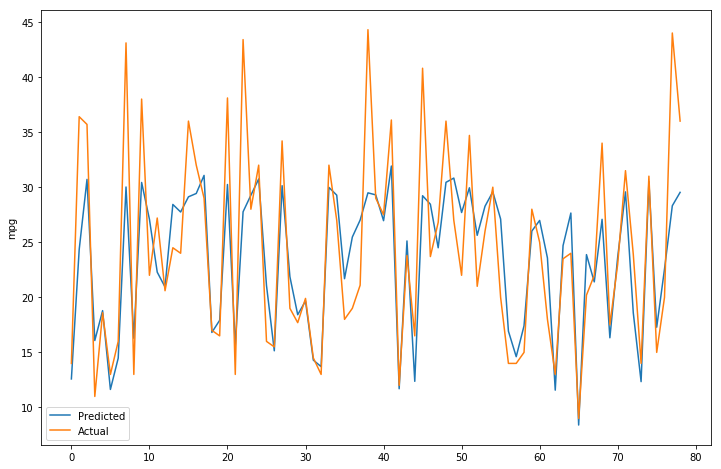

In [32]:
# implementing model
from functools import partial
# building elasticnet model
# model based on all feature as ols
result_dict['mpg_kitchen_sink_elasticnet_ols'] = build_models(partial(elastic_net_reg, alpha=0, equivalent_to='OLS'), 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True)

Equivalent To:  Lasso
Training Score : 0.6892816226745506
Test Score : 0.7724992016231189


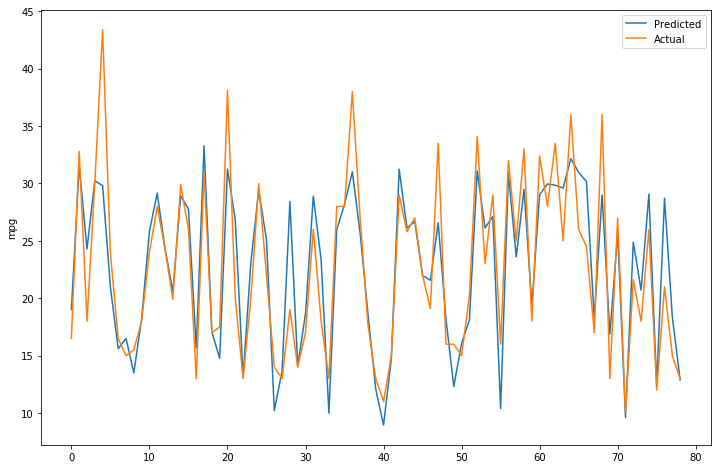

In [38]:
# model based on all feature as lasso
result_dict['mpg_kitchen_sink_elasticnet_lasso'] = build_models(partial(elastic_net_reg, alpha=1, l1_ratio=1, equivalent_to='Lasso'), 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True)

Equivalent To:  Ridge
Training Score : 0.7110140077043048
Test Score : 0.687180140693055


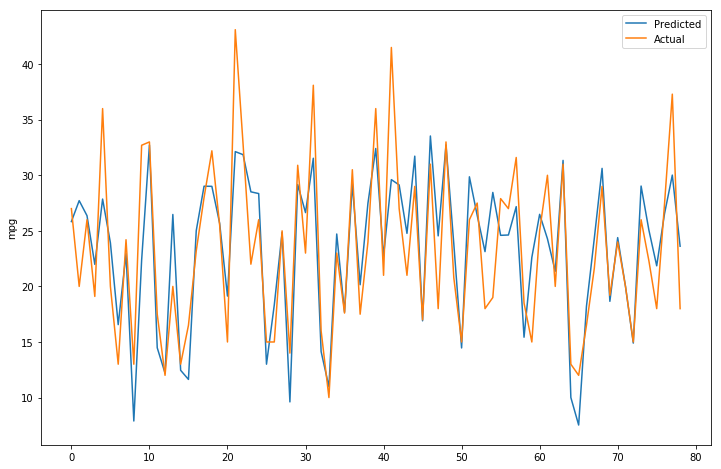

In [39]:
# model based on all feature as ridge
result_dict['mpg_kitchen_sink_elasticnet_ridge'] = build_models(partial(elastic_net_reg, alpha=1, l1_ratio=0, equivalent_to='Ridge'), 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True)

Equivalent To:  Elasticnet
Training Score : 0.7099476362153745
Test Score : 0.6916995927848674


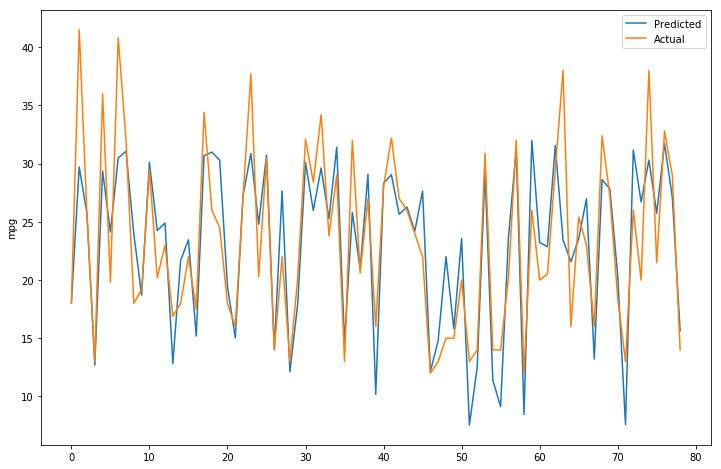

In [40]:
# model based on all feature as elasticnet
result_dict['mpg_kitchen_sink_elasticnet'] = build_models(partial(elastic_net_reg, alpha=1, l1_ratio=0.5, equivalent_to='Elasticnet'), 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True)

In [41]:
# comparing results
compare_results()

Regression Model : mpg_single_linear
Training Score : 0.7049230727424537
Test Score : 0.6400786348254428

Regression Model : mpg_kitchen_sink_linear
Training Score : 0.7262814641114637
Test Score : 0.6235369204132127

Regression Model : mpg_parsimonious_linear
Training Score : 0.7014756793395163
Test Score : 0.7202104623349477

Regression Model : mpg_kitchen_sink_lasso
Training Score : 0.7019158073070649
Test Score : 0.7190347257809007

Regression Model : mpg_kitchen_sink_ridge
Training Score : 0.6784894282021642
Test Score : 0.7180641103771415

Regression Model : mpg_kitchen_sink_elasticnet_ols
Training Score : 0.7141804539734877
Test Score : 0.6715619400309683

Regression Model : mpg_kitchen_sink_elasticnet_lasso
Training Score : 0.6892816226745506
Test Score : 0.7724992016231189

Regression Model : mpg_kitchen_sink_elasticnet_ridge
Training Score : 0.7110140077043048
Test Score : 0.687180140693055

Regression Model : mpg_kitchen_sink_elasticnet
Training Score : 0.7099476362153745
Te

In [44]:
# helper method for SVR support vector regressor
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train, y_train)
    
    return model

Training Score : 0.6909502313125244
Test Score : 0.6470963256771438


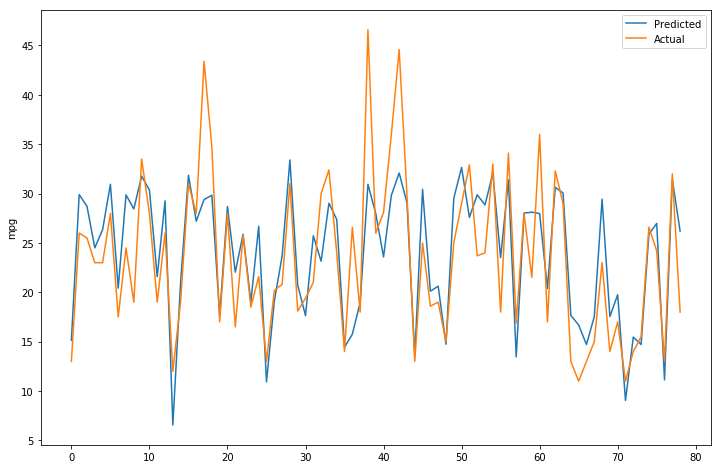

In [46]:
# building SVR model
# model based on all feature 
result_dict['mpg_kitchen_sink_svr_reg'] = build_models(svr_reg, 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True)

In [47]:
# comparing all models
compare_results()

Regression Model : mpg_single_linear
Training Score : 0.7049230727424537
Test Score : 0.6400786348254428

Regression Model : mpg_kitchen_sink_linear
Training Score : 0.7262814641114637
Test Score : 0.6235369204132127

Regression Model : mpg_parsimonious_linear
Training Score : 0.7014756793395163
Test Score : 0.7202104623349477

Regression Model : mpg_kitchen_sink_lasso
Training Score : 0.7019158073070649
Test Score : 0.7190347257809007

Regression Model : mpg_kitchen_sink_ridge
Training Score : 0.7067174575189165
Test Score : 0.6783059543994914

Regression Model : mpg_kitchen_sink_elasticnet_ols
Training Score : 0.7141804539734877
Test Score : 0.6715619400309683

Regression Model : mpg_kitchen_sink_elasticnet_lasso
Training Score : 0.6892816226745506
Test Score : 0.7724992016231189

Regression Model : mpg_kitchen_sink_elasticnet_ridge
Training Score : 0.7110140077043048
Test Score : 0.687180140693055

Regression Model : mpg_kitchen_sink_elasticnet
Training Score : 0.7099476362153745
Te

In [50]:
# defining KNN regression helper function
def kneighbors_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training Score : 0.7655500439847505
Test Score : 0.7196113583011194


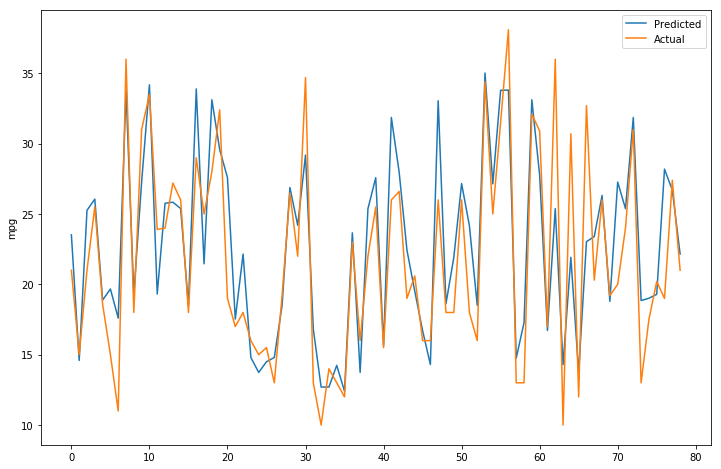

In [51]:
# building KNN regression model
# model based on all feature 
result_dict['mpg_kitchen_sink_knn_reg'] = build_models(kneighbors_reg, 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True)

In [55]:
# standardization, mean = 0 and standard variation = 1
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)

In [64]:
# implementing SGD stochastic gradient descent
def sgd_reg(x_train, y_train, max_iter=1000000, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

Training Score : 0.706207297658873
Test Score : 0.7024187635255594


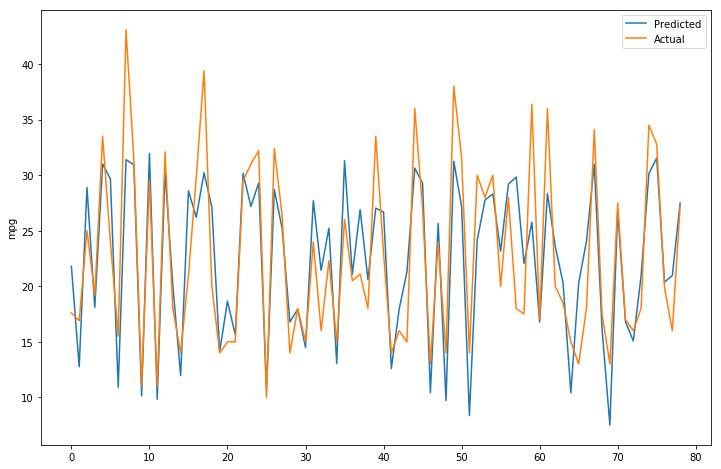

In [65]:
# building SGD regression model
# model based on all feature 
result_dict['mpg_kitchen_sink_sgd_reg'] = build_models(sgd_reg, 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True, preprocess_fn=apply_standard_scaler)

In [68]:
# decision tree regression
def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training Score : 0.7494278212799099
Test Score : 0.6336555323500142


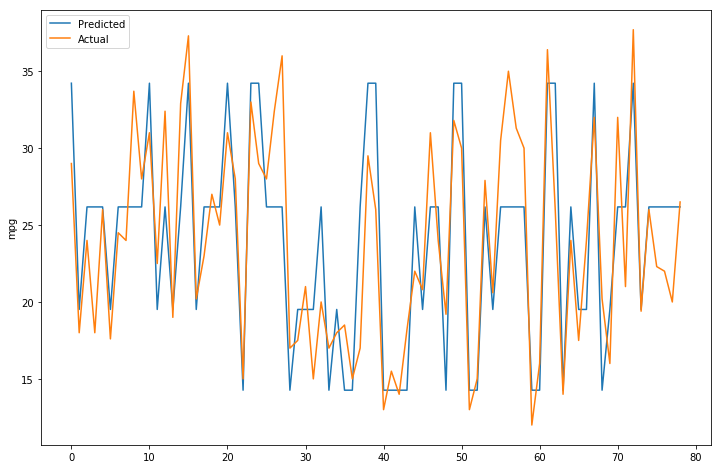

In [69]:
# building decision tree regression model
# model based on all feature 
result_dict['mpg_kitchen_sink_decision_tree_reg'] = build_models(decision_tree_reg, 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True)

In [70]:
# building LARS least angle regression
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

Training Score : 0.6897740722261716
Test Score : 0.7664683731535182


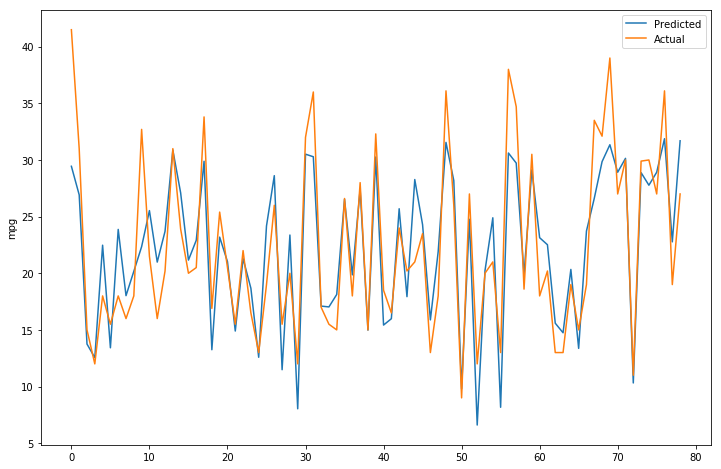

In [73]:
# building LARS least angle regression model
# model based on all feature 
result_dict['mpg_kitchen_sink_lars_reg'] = build_models(lars_reg, 'mpg',\
                                                ['weight', 'cylinders', 'displacement', 'horsepower', 'acceleration'],
                                                automobile_df, show_plot_Y=True)

In [74]:
# comparing scores
compare_results()

Regression Model : mpg_single_linear
Training Score : 0.7049230727424537
Test Score : 0.6400786348254428

Regression Model : mpg_kitchen_sink_linear
Training Score : 0.7262814641114637
Test Score : 0.6235369204132127

Regression Model : mpg_parsimonious_linear
Training Score : 0.7014756793395163
Test Score : 0.7202104623349477

Regression Model : mpg_kitchen_sink_lasso
Training Score : 0.7019158073070649
Test Score : 0.7190347257809007

Regression Model : mpg_kitchen_sink_ridge
Training Score : 0.7067174575189165
Test Score : 0.6783059543994914

Regression Model : mpg_kitchen_sink_elasticnet_ols
Training Score : 0.7141804539734877
Test Score : 0.6715619400309683

Regression Model : mpg_kitchen_sink_elasticnet_lasso
Training Score : 0.6892816226745506
Test Score : 0.7724992016231189

Regression Model : mpg_kitchen_sink_elasticnet_ridge
Training Score : 0.7110140077043048
Test Score : 0.687180140693055

Regression Model : mpg_kitchen_sink_elasticnet
Training Score : 0.7099476362153745
Te